# Reducción de dimensionalidad mediante descomposición de valores singulares (SVD)

La descomposición de valores singulares (SVD, por sus siglas en inglés) es un método de descomposición de matrices que ha sido aplicado en la reducción de dimensionalidad.

Una SVD de una matriz es la factorización del tipo:

$
\boldsymbol{A} = U{\Sigma}V^T
$

Donde:
- A es una matriz real de tamaño m x n (es la matriz que se desea descomponer)
- U es una matriz ortogonal de tamaño m x m 
- ${\Sigma}$ es una matriz diagonal de tamaño m x n
- V es una matriz ortogonal de tamaño n x n


Recordemos que:
- Los elementos de la matriz ${\Sigma}$ se les conoce como valores singulares de la matriz A.
- Las columnas de la matriz U son llamados vectores singulares a la izquierda de A.
- Las columnas de la matriz V son llamados vectores singulares a la derecha de A.


La descomposición de valores singulares tiene múltiples aplicaciones en estadísticas, aprendizaje de máquinas y en las ciencias computacionales:
- Compresión de imágenes
- Mínimos cuadrados
- Procesamiento de señales
- Clasificación de textos


En esta libreta realizaremos tres actividades:
- Cálculo de la SVD dada la matriz A y su reconstrucción a partir de las matrices obtenidas de la SVD
- Compresión de imágenes
- Modelado de tópicos

## 1) Descomposición de valores singulares de la matriz A
Dada una matriz A calcular su descomposición en valores singulares y posteriormente reconstruirla.

In [1]:
#Carga de bibliotecas de numpy y scipy
from numpy import array
from scipy.linalg import svd
#Definimos la matriz A
A = array([[5,1],[2,-2],[4,9]])
print(A)

[[ 5  1]
 [ 2 -2]
 [ 4  9]]


In [2]:
#Descomposición de la matriz A
U, Sigma, VT = svd(A)
print("Matriz U:\n",U)
print("Matriz Sigma: \n",Sigma)
print("Matriz VT:\n",VT)

Matriz U:
 [[ 0.32743953  0.78898129 -0.51989603]
 [-0.06818241  0.56852442  0.81983605]
 [ 0.94240889 -0.23299896  0.23995201]]
Matriz Sigma: 
 [10.38265511  4.81668691]
Matriz VT:
 [[ 0.50762241  0.86157965]
 [ 0.86157965 -0.50762241]]


### Reconstrucción de la matriz original

In [3]:
# Reconstruir la matriz A, a partir de las matrices U, Sigma y VT.
from numpy import array
from scipy.linalg import svd
from numpy import diag
from numpy import dot
from numpy import zeros

#Definimos la matriz A
A = array([[5,1],[2,-2],[4,9]])
print(A)

[[ 5  1]
 [ 2 -2]
 [ 4  9]]


In [4]:
#Descomposición de la matriz A
U, Sigma, VT = svd(A)
print("Matriz U:\n",U)
print("Matriz Sigma: \n",Sigma)
print("Matriz VT:\n",VT)

Matriz U:
 [[ 0.32743953  0.78898129 -0.51989603]
 [-0.06818241  0.56852442  0.81983605]
 [ 0.94240889 -0.23299896  0.23995201]]
Matriz Sigma: 
 [10.38265511  4.81668691]
Matriz VT:
 [[ 0.50762241  0.86157965]
 [ 0.86157965 -0.50762241]]


In [5]:
# Creamos una matriz diagonal de tamano m x n
sigma_diagonal = zeros((A.shape[0], A.shape[1]))
print(sigma_diagonal)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [6]:
# Llenamos la matriz sigma_diagonal con los valores singulares (Sigma)
sigma_diagonal[:A.shape[1], :A.shape[1]] = diag(Sigma)
print(sigma_diagonal)

[[10.38265511  0.        ]
 [ 0.          4.81668691]
 [ 0.          0.        ]]


In [7]:
#Reconstruimos la matriz original
B = U.dot(sigma_diagonal.dot(VT))
print("Matriz reconstruida a partir de la factorización de A:\n", B)

Matriz reconstruida a partir de la factorización de A:
 [[ 5.  1.]
 [ 2. -2.]
 [ 4.  9.]]


## 2) Compresión de imágenes
Dada una imagen, buscamos minimizar / comprimir su tamaño, de tal forma que, la nueva imagen a generar tenga una calidad aceptable con respecto a la original.

In [8]:
#Carga de bibliotecas
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from PIL import Image
from scipy.linalg import svd

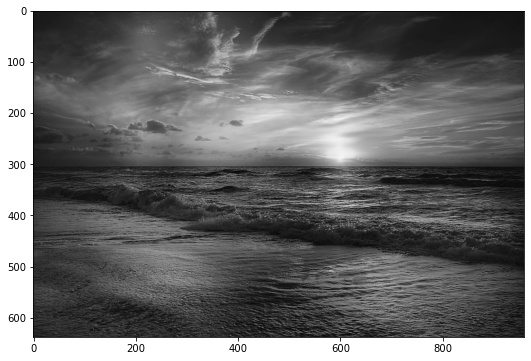

In [9]:
#Cargamos la imagen original y la convertimos a escala de grises
path_imagen = Image.open('../data/playa.jpg')
imagen_grises = path_imagen.convert('LA') #convertir en escala de grises.
plt.figure(figsize=(9, 6))
plt.imshow(imagen_grises);

In [10]:
#Convertimos la imagen a una matrix de numpy.
imagen_matriz = np.array(list(imagen_grises.getdata(band=0)), float)
imagen_matriz.shape = (imagen_grises.size[1], imagen_grises.size[0])
print("Tamaño de la matriz: ",imagen_matriz.shape)

Tamaño de la matriz:  (638, 960)


In [11]:
imagen_matriz = np.matrix(imagen_matriz)
print(imagen_matriz)

[[23. 23. 23. ... 20. 20. 20.]
 [22. 23. 23. ... 20. 20. 20.]
 [22. 23. 24. ... 20. 20. 20.]
 ...
 [39. 29. 24. ... 46. 48. 41.]
 [25. 25. 29. ...  7. 14. 17.]
 [23. 27. 32. ... 22. 22. 27.]]


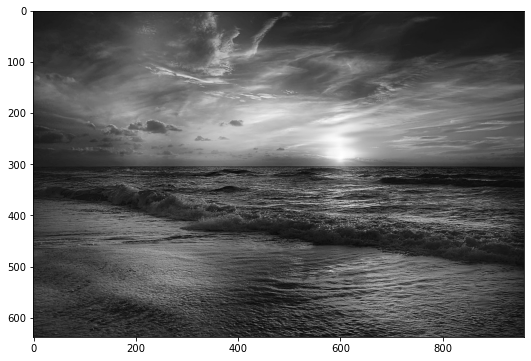

In [12]:
#Visualizamos la imagen, a partir de la matriz creada
plt.figure(figsize=(9,6))
plt.imshow(imagen_matriz, cmap='gray');

In [13]:
#Hacemos la SVD de la matriz creada
U, Sigma, VT = svd(imagen_matriz)
print("Matriz U:\n",U)
print("Matriz Sigma: \n",Sigma)
print("Matriz VT:\n",VT)

Matriz U:
 [[-0.01796946 -0.02115153  0.00933794 ... -0.1023505  -0.05747659
  -0.07645746]
 [-0.0179354  -0.02079     0.00941162 ...  0.17001256  0.12052246
   0.07832744]
 [-0.01793892 -0.02143326  0.01046991 ... -0.11623414 -0.10464508
  -0.07638447]
 ...
 [-0.02000476 -0.01505769 -0.03509813 ...  0.00153975 -0.00426679
  -0.00171824]
 [-0.02125222 -0.00610561 -0.03837151 ... -0.00175677 -0.00131107
   0.00189805]
 [-0.01933088 -0.01576288 -0.03007275 ...  0.00812457  0.0023606
   0.00212223]]
Matriz Sigma: 
 [6.97315283e+04 1.12179415e+04 1.01058779e+04 6.05120568e+03
 4.33843191e+03 3.71723511e+03 3.45300443e+03 3.09656651e+03
 2.84049071e+03 2.77545910e+03 2.68217356e+03 2.39914625e+03
 2.36785802e+03 2.29347835e+03 2.12172384e+03 2.09019967e+03
 2.03388049e+03 1.94951739e+03 1.91587318e+03 1.87635805e+03
 1.81464803e+03 1.77607612e+03 1.76613059e+03 1.73008171e+03
 1.71196531e+03 1.66370798e+03 1.60193323e+03 1.58449637e+03
 1.56021858e+03 1.55269419e+03 1.54766464e+03 1.5280677

In [14]:
print("Total de valores singulares de Sigma:",Sigma.shape)

Total de valores singulares de Sigma: (638,)


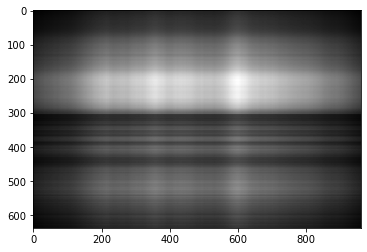

In [15]:
#Reconstruimos la imagen original: usando la 1ra columna de U, la 1era fila de VT y el 1er valor singular
imagen_reconstruida = np.matrix(U[:, :1]) * np.diag(Sigma[:1]) * np.matrix(VT[:1, :])
plt.imshow(imagen_reconstruida, cmap='gray');

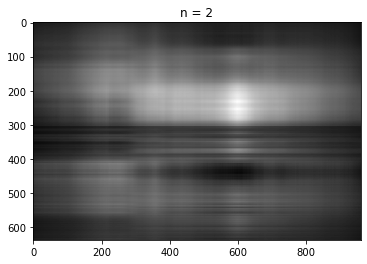

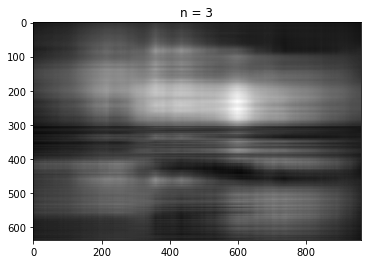

In [16]:
#Exploramos usando la 2da y 3ras columnas de U, filas de VT y valores singulares
for i in range(2, 4):
    reconstimg = np.matrix(U[:, :i]) * np.diag(Sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

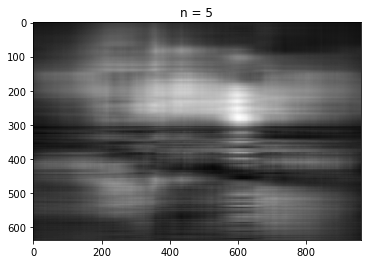

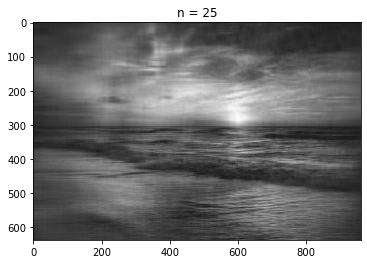

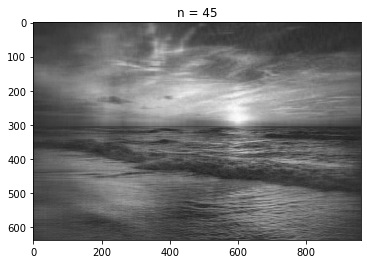

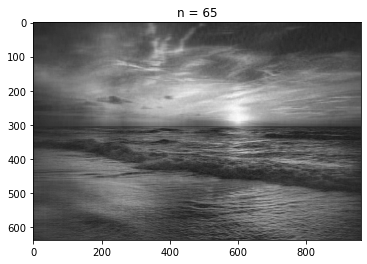

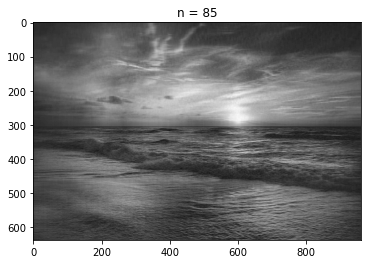

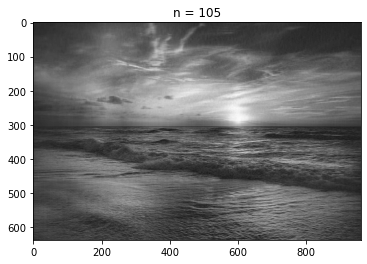

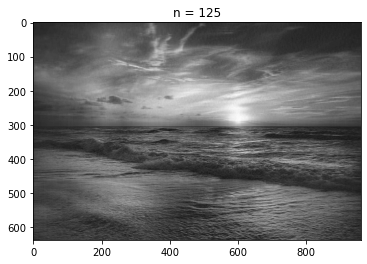

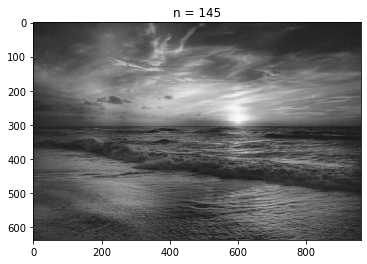

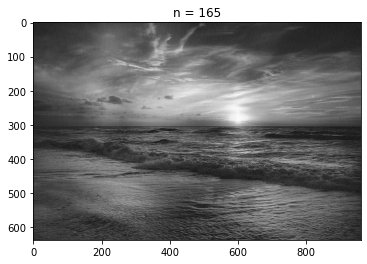

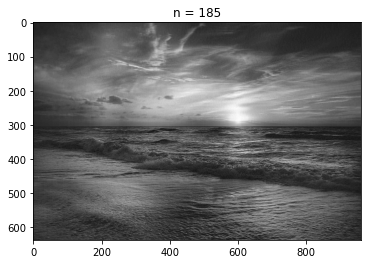

In [17]:
#Generamos un ciclo para reconstruir la imagen utilizando n vectores.
for i in range(5, 200, 20):
    reconstimg = np.matrix(U[:, :i]) * np.diag(Sigma[:i]) * np.matrix(VT[:i, :])
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [18]:
#Relación de compresión de la imagen: r = (n+m)k/nm
r = (imagen_matriz.shape[0]+imagen_matriz.shape[1])*65 /(imagen_matriz.shape[0]*imagen_matriz.shape[1])*100
print("% de la información original usado en la reconstrucción: {:.2f}".format(r))

% de la información original usado en la reconstrucción: 16.96


El siguiente ejemplo, realiza la descomposición de matriz dada una imagen y la reconstruyendo usando K vectores.
[Fuente](https://github.com/rameshputalapattu/jupyterexplore/blob/master/jupyter_interactive_environment_exploration.ipynb) 

In [19]:
#Carga de bibliotecas
from numpy.linalg import svd
from ipywidgets import interact,interactive,interact_manual
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

#Carga de imágenes
gray_images = {
        "cat":rgb2gray(img_as_float(data.chelsea())),
        "coffee":rgb2gray(img_as_float(data.coffee()))
}

In [20]:
#Realiza la SVD y a partir esta realiza la reconstrucción de una matriz
def calculo_svd(image,k):
    U,S,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
    return reconst_matrix,S

#Reconstrucción de la imagen en escala de grises
def compress_show_gray_images(img_name,k):
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = calculo_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0*(k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [21]:
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,300));

interactive(children=(Dropdown(description='img_name', options=('cat', 'coffee'), value='cat'), IntSlider(valu…

La SVD es una herramienta muy útil para la compresión de imágenes.

## 3) Modelado de tópicos
El objetivo de este ejercicio será extraer tópicos a partir de un conjunto de documentos usando la descomposición de valores singulares.

<img src="topicos.png"/>

El modelado de tópicos nos ayuda a:
- explorar grandes cantidades de documentos
- encontrar clúster de plabras
- similitud entre documentos
- descubrir tópicos

In [22]:
#Carga de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [23]:
#Cargamos los datos "fetch_20newsgroups"

from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print("Total de docs",len(documents))

Total de docs 11314


In [24]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

El dataset contiene 11,314 documentos distribuidos en 20 grupos de noticias diferentes

In [25]:
#Pre-procesamiento de los documentos
pre_data = pd.DataFrame({'document':documents})
pre_data['clean_doc'] = pre_data['document'].str.replace("[^a-zA-Z#]", " ")#se remueve signos, caracteres especiales..
pre_data['clean_doc'] = pre_data['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) #se remueve palabras cortas
pre_data['clean_doc'] = pre_data['clean_doc'].apply(lambda x: x.lower())#se convierte el texto a minúsculas.

In [26]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tokenized_doc = pre_data['clean_doc'].apply(lambda x: x.split())#tokenización
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])#eliminación de stop-words
detokenized_doc = []
for i in range(len(pre_data)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
pre_data['clean_doc'] = detokenized_doc

In [27]:
#Creamos una matriz de documentos y términos usando TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
                            max_features= 1000, # máximo número de términos
                            max_df = 0.5, 
                            smooth_idf=True)

X = vectorizer.fit_transform(pre_data['clean_doc'])
print("Tamaño de la matriz T-D: ", X.shape) # visualizamos el tamaño de la matriz
print(X)

Tamaño de la matriz T-D:  (11314, 1000)
  (0, 662)	0.12383418350146952
  (0, 442)	0.15794161190031353
  (0, 494)	0.11513968614781588
  (0, 72)	0.12938839670168176
  (0, 513)	0.13121292967386805
  (0, 366)	0.12603010928401598
  (0, 716)	0.1582581198153684
  (0, 815)	0.18315510708344293
  (0, 733)	0.1625104358450031
  (0, 153)	0.1570108300819353
  (0, 731)	0.16022739710760148
  (0, 712)	0.1274850603912534
  (0, 894)	0.08734163905515772
  (0, 474)	0.16700837669538923
  (0, 229)	0.16963934935748787
  (0, 710)	0.16477653269652684
  (0, 290)	0.17595259151323245
  (0, 986)	0.12080438380189064
  (0, 436)	0.34208519906207613
  (0, 529)	0.6567778396482741
  (0, 842)	0.1516824345832134
  (0, 850)	0.15610690151865933
  (0, 868)	0.11083032507767253
  (1, 336)	0.21610968006327091
  (1, 579)	0.2090150657514671
  :	:
  (11313, 162)	0.12246744316703376
  (11313, 185)	0.15901931792515023
  (11313, 911)	0.1696585245733748
  (11313, 97)	0.14464380399033505
  (11313, 946)	0.14195612945068303
  (11313, 514)

In [31]:
#Calculamos la descomposición de valores singulares de la matriz, usando la función "TruncatedSVD"
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, 
                        algorithm='randomized', 
                         n_iter=100, 
                         random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [30]:
#Los componentes del modelo, serán los tópicos de los documentos :D
terms = vectorizer.get_feature_names()

#Visualizamos algunas de las plabras más importantes en cada uno de los 20 tópicos
for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+":")
    for t in sorted_terms:
        print(t[0])

Topic 0:
like
know
people
think
good
time
thanks
Topic 1:
thanks
windows
card
drive
mail
file
advance
Topic 2:
game
team
year
games
season
players
good
Topic 3:
drive
scsi
disk
hard
card
drives
problem
Topic 4:
windows
file
window
files
program
using
problem
Topic 5:
chip
government
mail
space
information
encryption
data
Topic 6:
like
bike
chip
know
sounds
looks
look
Topic 7:
card
sale
video
monitor
offer
price
jesus
Topic 8:
know
card
chip
video
government
people
clipper
Topic 9:
good
know
time
bike
jesus
problem
work
Topic 10:
think
chip
good
thanks
clipper
encryption
need
Topic 11:
thanks
problem
right
bike
good
time
window
Topic 12:
good
people
windows
know
file
sale
files
Topic 13:
space
think
know
nasa
problem
year
israel
Topic 14:
space
good
card
people
time
nasa
thanks
Topic 15:
people
problem
window
game
time
want
using
Topic 16:
time
bike
right
windows
file
need
really
Topic 17:
time
problem
file
think
israel
long
mail
Topic 18:
file
need
card
files
problem
right
good
Topic 1